# Multi Linear Regression

In [104]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
# enables the embedding of Matplotlib figures directly in the output cells of the Jupyter Notebook.

X = companies.iloc[:, :-1].values # include all rows, exclude last column <br>
y = companies.iloc[:, -1].values # include all rows, include last column <br>

The .values attribute is used to convert the selected column into a NumPy array. <br>
This can be useful if you specifically need a NumPy array for some operations or <br>
if you want to use the array in a context where NumPy functionality is required.<br> <br>
Without the .values attribute, y will be a pandas Series. <br>
The Series retains the index information associated with the DataFrame, and it also retains the column name. <br>
This can be beneficial if you want to keep the additional metadata associated with the Series. <br>

In [105]:
companies = pd.read_csv('D:/Data Projects/ML/Multi_Linear_regression/Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, -1].values

print(y)
print('\n \n ======================================================================================= \n \n ')
print(X)
print('\n \n ======================================================================================= \n \n ')
companies.head()

[192261.83    191792.06    191050.39    182901.99    166187.94
 156991.12    156122.51    155752.6     152211.77    149759.96
 146121.95    144259.4     141585.52    134307.35    132602.65
 129917.04    126992.93    125370.37    124266.9     122776.86
 118474.03    111313.02    110352.25    108733.99    108552.04
 107404.34    105733.54    105008.31    103282.38    101004.64
  99937.59     97483.56     97427.84     96778.92     96712.8
  96479.51     90708.19     89949.14     81229.06     81005.76
  78239.91     77798.83     71498.49     69758.98     65200.33
  64926.08     49490.75     42559.73     35673.41     14681.4
 123485.2464   82155.48418 125867.0108  104976.1696   89803.10053
  75297.23305 114284.5283  171985.0761   72337.96774 169566.5772
 158670.9451  114522.8756   85842.60573 101106.2297   59328.81874
 157142.6178   68669.64059 177717.3712   94409.4396  183945.1553
  82484.38635 144515.3371  105333.2634  122331.0988  168459.4156
  60947.70089 162733.9549  181574.4968   7357

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [106]:
#companies.describe()
#companies.info()
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

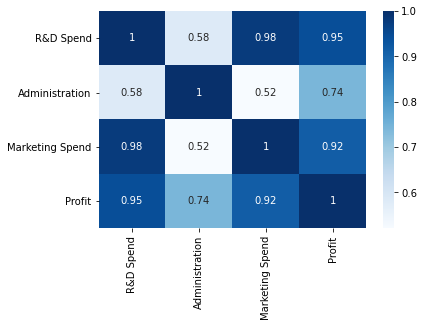

In [107]:
# Correlation matrix
sns.heatmap(companies.corr(), annot=True, cmap ='Blues')

In [110]:
unique_states = pd.unique(X[:, 3])
unique_states

array(['New York', 'California', 'Florida'], dtype=object)

## Encoding
It is the process of converting categorical variables, which represent categories or labels, into a numerical format that can be used for machine learning algorithms.

One-Hot Encoding: <br>
Creates binary columns for each category and indicates the presence of the category with a 1.

Label Encoding:  <br>
Assigns a unique integer to each category.

X[:, 3] = labelencoder.fit_transform(X[:, 3]) # encode State column



In [111]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

onehotencoder = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), [2])], remainder='passthrough')
X = onehotencoder.fit_transform(X).toarray()

X

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6534920e+05,
        1.3689780e+05, 2.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6259770e+05,
        1.5137759e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5344151e+05,
        1.0114555e+05, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0027547e+05,
        2.4192631e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.2845623e+05,
        3.2165214e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6118172e+05,
        2.7093986e+05, 2.0000000e+00]])

In [112]:
print(X[:, 3].shape)

(1000,)


In [113]:
print(type(X[:, 3][0]))

<class 'numpy.float64'>


In [117]:
X[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.0000

In [116]:
X = X[:, 1:]
X

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6534920e+05,
        1.3689780e+05, 2.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6259770e+05,
        1.5137759e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5344151e+05,
        1.0114555e+05, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0027547e+05,
        2.4192631e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.2845623e+05,
        3.2165214e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6118172e+05,
        2.7093986e+05, 2.0000000e+00]])

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [119]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = regressor.predict(X_test)
y_pred

array([ 84136.89586623,  82657.25375986,  89675.54358512, 177955.02319828,
        77291.0038204 , 106763.72390456, 107564.49530547,  85962.93624549,
       165388.83877524,  45070.31206775,  59351.72666548, 150702.23185954,
       124422.45679055,  51091.24516848, 179329.37725321,  68506.26902525,
       115632.19983445, 165288.14171323, 154180.39297979, 184348.55738581,
        99467.62108909,  79665.37832351, 183719.01603603,  78010.67472179,
       100647.6159029 ,  96554.15668462,  41894.74737939,  48501.76852017,
        61463.63874458, 193321.34295066, 118378.24423703, 107938.74092451,
        96906.2718567 , 137021.36226758,  56117.74489741, 104827.67467736,
       188630.11457881, 173355.93423788, 176830.15997113, 115006.44810148,
        91744.75129057, 166240.73697539, 103597.5883219 ,  41784.18432947,
       113750.28876325,  50325.81671768, 159220.64970651,  72544.72380758,
       160643.48994165, 129619.42704125, 187938.18429724, 176791.98167174,
        88428.69602459,  

In [121]:
print(regressor.coef_)

[ 6.99232187e+02  1.42699561e+04 -2.64010162e+04 -2.92951634e+03
  9.06135416e+03  9.05720226e+03  9.02913858e+03  4.17730189e-06
  8.29674694e+03  8.29590117e+03  8.95463528e+03  8.61212059e+03
  8.61119795e+03  8.94856122e+03  8.26599221e+03  8.91726830e+03
 -4.42123564e-08  8.21401674e+03  8.87997820e+03  8.86744565e+03
  8.52208616e+03  8.17695730e+03  8.16288703e+03 -3.61669663e-08
  8.14035920e+03  8.78171687e+03  8.77741122e+03  8.76211075e+03
  1.81444193e-09  8.05778278e+03  8.36154653e+03  8.35624134e+03
  8.34847577e+03  8.68568528e+03  8.68068763e+03  8.62379141e+03
  8.27950832e+03  8.61848621e+03  8.26874416e+03  8.25936398e+03
  8.59726546e+03  8.56159000e+03  8.55997537e+03  8.54828858e+03
  8.54282961e+03  7.83373466e+03  1.20111508e-07  7.77645401e+03
  7.77530070e+03  8.45671641e+03  7.76953419e+03  1.57655450e-07
  7.75700164e+03  7.75015872e+03  7.74331579e+03  8.41450556e+03
  8.05522954e+03  8.04823285e+03  6.01739885e-08  4.73301043e-09
 -2.52730388e-08  7.65005

In [122]:
print(regressor.intercept_)

31711.887624922747


In [123]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8142474191049955